In [16]:
import pickle 
import ase 
import os, sys
import numpy as np 
from numpy.linalg import norm
from ase import Atoms
import matplotlib.pyplot as plt

dict_used_for_mc_analyses = pickle.load(open("dict_used_for_mc_analyses.pkl","rb"))
                                    
list_e = {'free':[]}
list_d_alal = [] 
list_d_cucu = []
list_e_raw_dimer = []
list_atoms = []
list_Tcount = []

traj = []
for key_to_use in dict_used_for_mc_analyses.keys():
    # The CuOCu dimer, Al atoms (i.e. 2) and the neighboring oxygen atoms (i.e. 4 for each Al) 
    # are unconstrained during the optimization . 
    
    # Formation energy of the dimer 
    form_e_free = dict_used_for_mc_analyses[key_to_use]['form_e_free']
    list_e['free'].append(form_e_free)    
    
    # Al-Al distance of the optimized dimer
    list_d_alal.append(dict_used_for_mc_analyses[key_to_use]['free_d_alal'])
    
    # Cu-Cu distance of the optimized dimer
    list_d_cucu.append(dict_used_for_mc_analyses[key_to_use]['free_d_cucu'])
    
    # Number of Si atoms between the two Al 
    list_Tcount.append(dict_used_for_mc_analyses[key_to_use]['Tcount'])
    
    # DFT energy of the CuOCu dimer
    list_e_raw_dimer.append(dict_used_for_mc_analyses[key_to_use]['e_raw_dimer'])
    
    # Atoms object corresponding to the optimized dimer 
    list_atoms.append(dict_used_for_mc_analyses[key_to_use]['atoms'])
    
    # Directory name for the Kulkarni group 
    dir_name = dict_used_for_mc_analyses[key_to_use]['dir_name']
    
    
print('Done reading data')

Done reading data


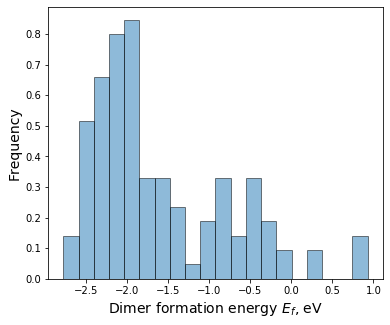

In [10]:
# Plot histogram of formation energies
fig,ax1 = plt.subplots(figsize=(6,5))
plt.hist(list_e['free'],bins=20,label='Unconstrained-Al',density=True,alpha=0.5,edgecolor='k')
plt.xlabel('Dimer formation energy $E_f$, eV', fontsize = 14)   
plt.ylabel('Frequency',fontsize=14)
plt.show()

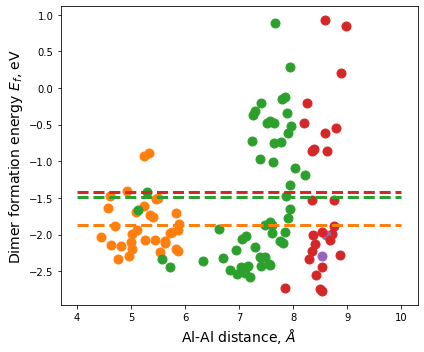

In [14]:
# Plot dimer formation energy vs. distance for various T site separations
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig,ax1 = plt.subplots(figsize=(6,5))
e_Tcount = {1:[],2:[],3:[],4:[]}
min_e_Tcount = {1:100,2:100,3:100,4:100}
min_atoms_Tcount = {1:[],2:[],3:[],4:[]}
legend_count = np.zeros(4)
for e,d_alal,Tcount,atoms in zip(list_e['free'],list_d_alal,list_Tcount,list_atoms):
    if legend_count[Tcount - 1] == 0 :
        plt.plot(d_alal,e,'o',color=color_cycle[Tcount],ms=9, label = '%sT' % str(Tcount))
        legend_count[Tcount - 1] = 1.0
    else: 
        plt.plot(d_alal,e,'o',color=color_cycle[Tcount],ms=9)
    e_Tcount[Tcount].append(e)
    if e < min_e_Tcount[Tcount]:
        min_e_Tcount[Tcount] = e 
        min_atoms_Tcount[Tcount] = atoms
        
for Tcount in [1,2,3]:#,4]:
    T = 273 + 80
    avg_Tcount = np.average(e_Tcount[Tcount])
    plt.plot([4,10],[avg_Tcount,avg_Tcount],color=color_cycle[Tcount],ls='--',lw=3)
    #io.write('min_atoms_Ef_%s.traj' %str(Tcount), min_atoms_Tcount[Tcount])
ax2 = plt.gca()
ax2.set_xlabel('Al-Al distance, $\AA$', fontsize=14)
plt.ylabel('Dimer formation energy $E_f$, eV',fontsize=14) 
plt.xlabel('Al-Al distance, $\AA$')
plt.tight_layout()
plt.show()

In [15]:
# Visualize the atoms
from ase.visualize import view
view(list_atoms)
